In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("cluster_data.csv")

In [4]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
2295,-229.000000,-504.000000
2296,392.000000,-580.000000
2297,134.000000,525.000000
2298,469.000000,-535.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2300 non-null   float64
 1   1       2300 non-null   float64
dtypes: float64(2)
memory usage: 36.1 KB


In [6]:
df.isnull().sum()

0    0
1    0
dtype: int64

In [7]:
df.shape

(2300, 2)

In [8]:
df.describe()

,0,1
count,2300.000000,2300.000000
mean,-26.831712,-24.626332
std,291.911852,291.026822
min,-597.000000,-612.225217
25%,-266.074324,-263.291755
50%,-33.224781,-25.293986
75%,211.542143,216.016792
max,594.000000,593.000000


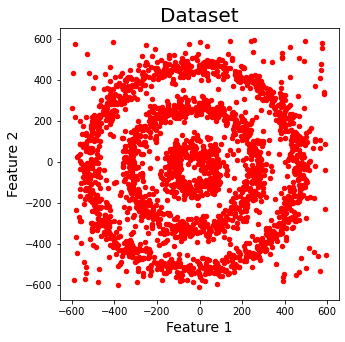

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(df["0"],df["1"],s=20,color='red')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## KMeans Custering

In [13]:
from sklearn.cluster import KMeans
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Inertia')

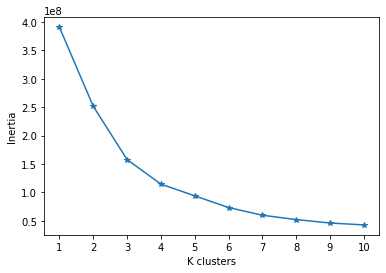

In [18]:
plt.plot(k,ssd,marker='*')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

In [19]:
model=KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

Text(0, 0.5, 'Feature 2')

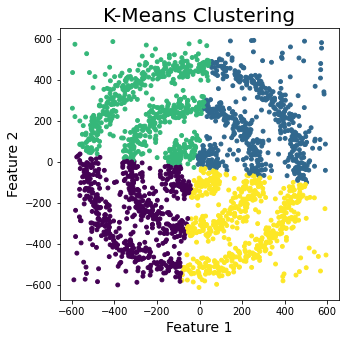

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(df["0"],df["1"],c=model.labels_,s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

## Hierarchical Agglomeritve Clustering

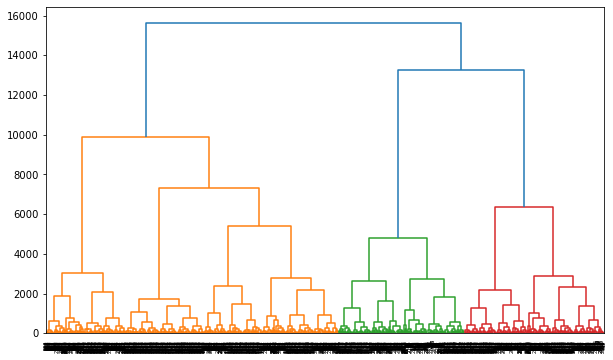

In [21]:
from scipy.cluster import hierarchy
fig=plt.figure(figsize=(10,6))
den=hierarchy.dendrogram(hierarchy.linkage(df,method='ward'))

In [23]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4)
model.fit(df)

AgglomerativeClustering(n_clusters=4)

Text(0, 0.5, 'Feature 2')

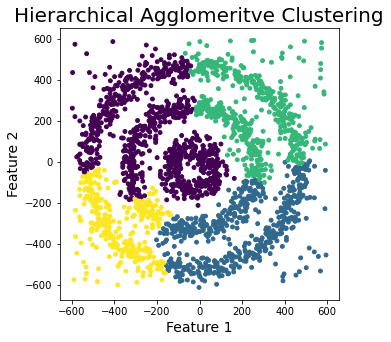

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(df["0"],df["1"],c=model.labels_,s=15)
plt.title('Hierarchical Agglomeritve Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

## DBSCAN

### Density-Based Spatial Clustering of Applications with Noise

### K-distance graph

In [25]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

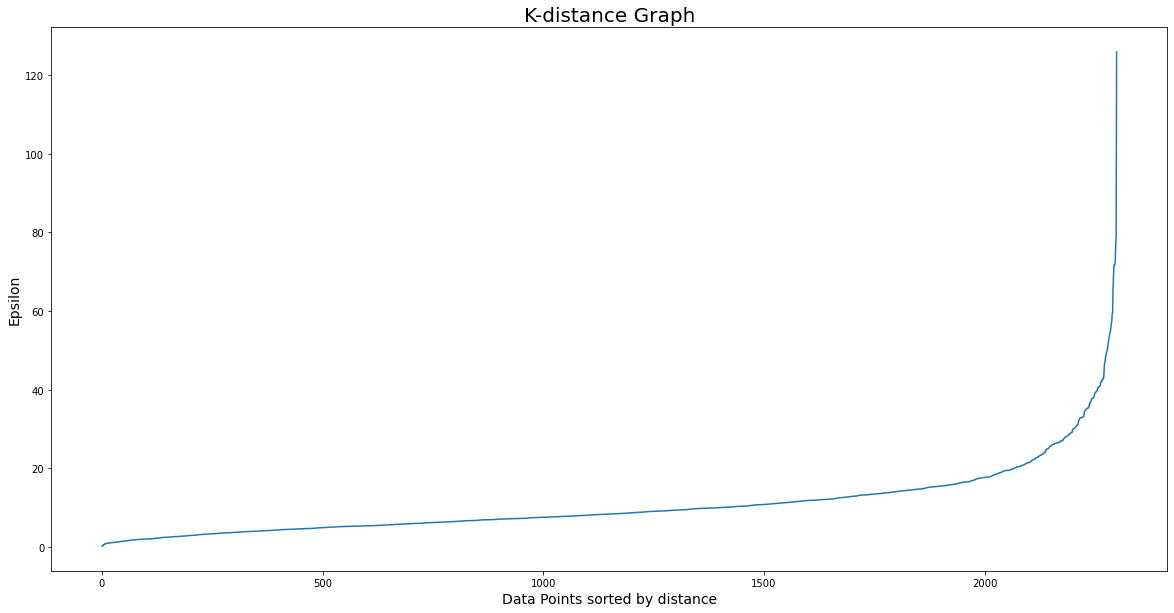

In [26]:
plt.figure(figsize=(20,10))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [27]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=30,min_samples=4)
model.fit(df)

DBSCAN(eps=30, min_samples=4)

Text(0, 0.5, 'Feature 2')

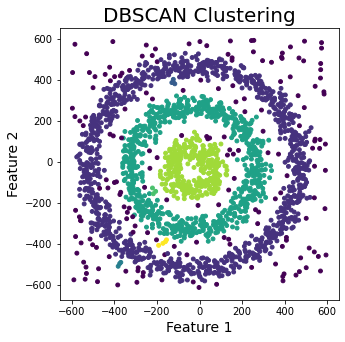

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(df["0"],df["1"],c=model.labels_,s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)